<a href="https://colab.research.google.com/github/dookda/cmu_deep_learning/blob/main/YOLO8_sky_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Apr 30 09:15:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!mkdir sky_detect

In [4]:
!unzip /content/drive/MyDrive/_DATASET/sky.v6i.yolov8.zip -d /content/sky_detect

Streaming output truncated to the last 5000 lines.
  inflating: /content/sky_detect/sky.v6i.yolov8/valid/images/2db321cf214a07ccb7aa59fa3e2773d4_jpg.rf.8b5c6a0ae2e686aa6b62b6a3f65b4882.jpg  
  inflating: /content/sky_detect/__MACOSX/sky.v6i.yolov8/valid/images/._2db321cf214a07ccb7aa59fa3e2773d4_jpg.rf.8b5c6a0ae2e686aa6b62b6a3f65b4882.jpg  
  inflating: /content/sky_detect/sky.v6i.yolov8/valid/images/3_jpg.rf.5d80d2994356b650cab7a03a6fea96cc.jpg  
  inflating: /content/sky_detect/__MACOSX/sky.v6i.yolov8/valid/images/._3_jpg.rf.5d80d2994356b650cab7a03a6fea96cc.jpg  
  inflating: /content/sky_detect/sky.v6i.yolov8/valid/images/51cc351c3461891d0f6f7e46a9043c31_jpg.rf.f2ac1e71edada4b88004bbd2a24a1a7d.jpg  
  inflating: /content/sky_detect/__MACOSX/sky.v6i.yolov8/valid/images/._51cc351c3461891d0f6f7e46a9043c31_jpg.rf.f2ac1e71edada4b88004bbd2a24a1a7d.jpg  
  inflating: /content/sky_detect/sky.v6i.yolov8/valid/images/000514964_jpg.rf.003008ea909fcc8f899f005deb741d03.jpg  
  inflating: /content

In [5]:
!rm -r sky_detect/sky.v6i.yolov8/
!rm -r sky_detect/__MACOSX/

In [6]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 14.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [8]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [9]:
dataDir = '/content/sky_detect/'

Text(0.5, 0.98, 'Random selection of Dataset Images')

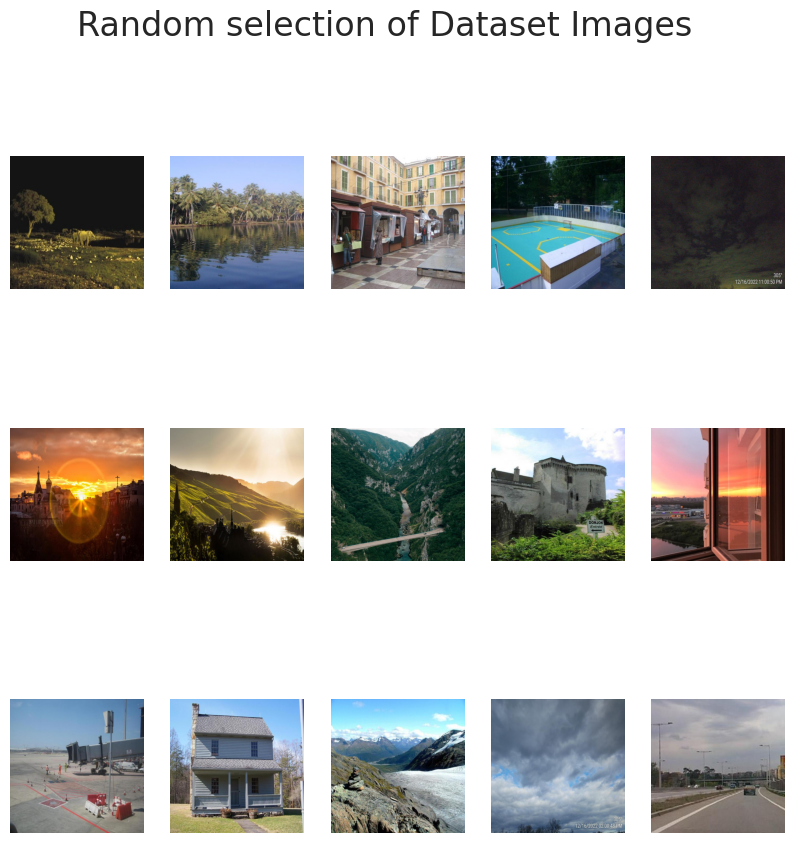

In [10]:
trainImagePath = os.path.join(dataDir, 'train', 'images')

imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10,10))

for i, image_file in enumerate(randomImages):
  image_path = os.path.join(trainImagePath, image_file)
  image = Image.open(image_path)
  plt.subplot(3, 5, i + 1)
  plt.imshow(image)
  plt.axis('off')

plt.suptitle('Random selection of Dataset Images', fontsize=24)

In [11]:
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 256MB/s]


In [12]:
yamlFilePath = os.path.join(dataDir, 'data.yaml')

In [13]:
results = model.train(
    data=yamlFilePath,
    epochs=50,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device=0,
    seed=42
)

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/sky_detect/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 85.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 344MB/s]


AMP: checks passed ✅


train: Scanning /content/sky_detect/train/labels... 1072 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<00:00, 1080.11it/s]

train: WARNING ⚠️ /content/sky_detect/train/images/ADE_val_00000491_jpg.rf.968f72ae14f0ef791664f73e3db160cd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/ADE_val_00000996_jpg.rf.ff29b1d0b368185db0a053929aff453d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/ADE_val_00001112_jpg.rf.5c0a359a6ff67dd4c3267086a490c5dc.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/ADE_val_00001300_jpg.rf.33a254b0ee7c90d89e27dcd0db2f5acd.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/IMG_3542_jpg.rf.a587bce4c990fbb5ec427d7d47f61e55.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/leszczyna-1639079_jpg.rf.9db1f6f2ae9db0fce7fadc1f8cd0d2b5.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/sky_detect/train/images/red-moon-1631900_jpg.rf.c8274a3a94bc8916e92015b9541fee67.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/

train: New cache created: /content/sky_detect/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/sky_detect/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 941.14it/s]

val: WARNING ⚠️ /content/sky_detect/valid/images/201105123338_jpg.rf.469ca696d23ff3d90e4da7daf3aa17cc.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/sky_detect/valid/images/2db321cf214a07ccb7aa59fa3e2773d4_jpg.rf.8b5c6a0ae2e686aa6b62b6a3f65b4882.jpg: 1 duplicate labels removed
val: New cache created: /content/sky_detect/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.77G      1.059      2.961      2.148      1.363         55        640: 100%|██████████| 34/34 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        200        249      0.275      0.163      0.193     0.0893       0.22      0.141      0.134     0.0702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.77G      0.968      1.563      1.466      1.278         53        640: 100%|██████████| 34/34 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        200        249      0.525      0.554      0.491      0.272      0.513      0.546      0.475      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.71G     0.9728      1.533      1.335      1.265         54        640: 100%|██████████| 34/34 [00:07<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


                   all        200        249      0.446      0.523      0.457       0.23      0.444      0.514      0.446       0.22

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.73G     0.9622       1.56      1.254      1.254         54        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        200        249      0.623      0.602      0.564      0.255      0.295      0.285       0.17     0.0672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.86G     0.9347      1.491      1.139      1.221         62        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        200        249      0.418       0.53      0.374      0.208      0.424      0.506      0.371      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.9G     0.8798      1.305      1.039        1.2         47        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        200        249      0.177      0.201      0.108     0.0433      0.204      0.189      0.114     0.0505



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.82G     0.8809      1.448      1.025      1.222         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        200        249      0.446      0.402       0.33       0.17      0.446      0.402      0.311      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.81G     0.8457      1.404     0.9473      1.193         61        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        200        249      0.408      0.468      0.411      0.246       0.35      0.502      0.398      0.239



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.81G     0.7969      1.216     0.9044      1.166         50        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        200        249      0.589      0.627      0.567      0.379      0.586      0.627      0.539       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.66G     0.8229      1.263     0.9187      1.178         53        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        200        249      0.776      0.691      0.729      0.546      0.766      0.679      0.697      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.79G     0.7924      1.276     0.8848      1.147         51        640: 100%|██████████| 34/34 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        200        249      0.756      0.715      0.723      0.503      0.756      0.715      0.724       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.78G     0.7794      1.252     0.8632      1.146         65        640: 100%|██████████| 34/34 [00:07<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        200        249      0.629       0.66      0.627      0.405      0.629      0.662      0.624      0.408



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.74G     0.7896      1.255     0.8706      1.164         58        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        200        249      0.763      0.747      0.727      0.547      0.762      0.743      0.716      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.79G     0.7341      1.181     0.7823      1.124         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        200        249      0.807      0.751      0.759      0.604      0.808      0.751      0.758      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.82G     0.7409      1.216     0.7925      1.135         56        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        200        249      0.771      0.655      0.708      0.564      0.769      0.655      0.714      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.83G     0.7529      1.211     0.8013      1.134         51        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.786      0.663      0.711      0.538      0.814      0.655      0.716      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.73G     0.7395      1.271     0.7909      1.121         43        640: 100%|██████████| 34/34 [00:07<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        200        249      0.762      0.647      0.716      0.545      0.753      0.639      0.692      0.533



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.79G     0.7197      1.138     0.7714      1.117         39        640: 100%|██████████| 34/34 [00:07<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        200        249       0.75      0.649      0.735      0.635      0.734      0.665      0.729      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.83G     0.6931      1.059     0.7334      1.093         70        640: 100%|██████████| 34/34 [00:06<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        200        249      0.778      0.592      0.694      0.528      0.819      0.606      0.703      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.77G     0.7094      1.205     0.7575      1.107         52        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.594      0.634      0.567      0.395      0.575      0.614      0.537      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.85G     0.7047      1.108     0.7529      1.104         53        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        200        249      0.738      0.622      0.708      0.568       0.71      0.663      0.707      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50       5.7G     0.6913      1.062     0.7255      1.091         52        640: 100%|██████████| 34/34 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        200        249      0.684      0.663      0.672       0.55      0.695      0.667      0.672      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.92G     0.6754      1.141      0.727      1.082         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        200        249       0.75      0.723      0.713      0.606       0.74      0.743      0.707        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.86G     0.6731       1.13     0.7138      1.079         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        200        249      0.794      0.772      0.785      0.672       0.79      0.747      0.765      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.79G      0.663      1.068     0.6903      1.076         66        640: 100%|██████████| 34/34 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        200        249      0.755      0.743      0.723      0.599      0.751      0.739      0.718      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.87G     0.6541      1.127     0.6977      1.087         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]

                   all        200        249      0.785      0.779      0.783      0.638      0.794      0.787       0.79      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.81G     0.6352      1.053      0.662      1.073         50        640: 100%|██████████| 34/34 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.784      0.759       0.76       0.61      0.784      0.759       0.76      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.77G     0.6439      1.043     0.6541      1.066         47        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.757      0.787      0.771      0.635      0.766      0.803      0.771      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.74G     0.6348      1.104     0.6754      1.059         67        640: 100%|██████████| 34/34 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.778      0.731       0.76      0.646      0.784      0.735      0.765      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.83G     0.6447      1.012     0.6615      1.063         55        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        200        249      0.816      0.755      0.784      0.672      0.816      0.747      0.773      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.75G     0.6423      1.027     0.6677      1.062         63        640: 100%|██████████| 34/34 [00:07<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        200        249       0.87      0.754      0.768      0.663      0.863      0.771      0.771      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.78G     0.6192      1.103     0.6626      1.061         59        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.823      0.763      0.793      0.669      0.795      0.795      0.794      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.77G     0.6383      1.128     0.6478      1.061         36        640: 100%|██████████| 34/34 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        200        249      0.772      0.788      0.766       0.66      0.768      0.784      0.759      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.73G     0.6063     0.9636     0.6169      1.053         55        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        200        249      0.811      0.809      0.778      0.678      0.824      0.807      0.777      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.83G     0.6075     0.9633     0.6223      1.049         46        640: 100%|██████████| 34/34 [00:07<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        200        249      0.802      0.775      0.759      0.677      0.804      0.775      0.757       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.72G     0.6104      1.055     0.6333      1.052         44        640: 100%|██████████| 34/34 [00:07<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        200        249      0.837      0.759      0.777      0.651      0.837      0.759      0.772      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.83G     0.5647     0.9232      0.565       1.03         40        640: 100%|██████████| 34/34 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        200        249      0.712      0.796       0.74      0.658      0.728      0.797       0.75      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.84G     0.5907     0.9636     0.5889       1.04         72        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        200        249      0.799      0.779        0.8      0.695      0.804      0.787        0.8      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.72G     0.5823     0.9586     0.6098      1.043         60        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        200        249      0.824      0.807        0.8      0.706      0.812      0.814      0.802      0.685



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.72G     0.5927     0.9308      0.608       1.03         42        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        200        249      0.847      0.758      0.805       0.71      0.856      0.766      0.807      0.704


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.69G     0.6611      1.005     0.8824      1.092         35        640: 100%|██████████| 34/34 [00:09<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        200        249      0.851      0.779       0.82      0.745      0.863      0.786      0.823      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.77G     0.6234     0.9364     0.7602      1.066         16        640: 100%|██████████| 34/34 [00:06<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        200        249      0.888      0.795      0.808      0.715      0.896      0.798      0.812      0.711



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.69G     0.6044       0.89     0.6957      1.053         22        640: 100%|██████████| 34/34 [00:06<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        200        249      0.794      0.779      0.773       0.69       0.79      0.784      0.772      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.69G     0.6417     0.9447     0.7495      1.068         20        640: 100%|██████████| 34/34 [00:06<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        200        249      0.881      0.776      0.803      0.719      0.886      0.782      0.807      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.82G     0.5801     0.9193     0.6808      1.046         18        640: 100%|██████████| 34/34 [00:06<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        200        249      0.822      0.799      0.796      0.716      0.821      0.803      0.798      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.81G     0.5873     0.9432     0.6784      1.045         21        640: 100%|██████████| 34/34 [00:06<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        200        249      0.846      0.819      0.815      0.734      0.874      0.807      0.818      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.82G     0.5883     0.8708     0.6643      1.033         24        640: 100%|██████████| 34/34 [00:06<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        200        249      0.864      0.793      0.811      0.736      0.842      0.811      0.806      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.76G     0.5509     0.8498     0.6218       1.03         21        640: 100%|██████████| 34/34 [00:06<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        200        249      0.886      0.807      0.817      0.739      0.894      0.809      0.815      0.728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.77G     0.5584     0.8597     0.6512      1.027         18        640: 100%|██████████| 34/34 [00:06<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        200        249      0.859      0.823      0.828      0.759       0.87      0.831      0.827       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.69G      0.544     0.8608     0.6344      1.021         20        640: 100%|██████████| 34/34 [00:06<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        200        249      0.847      0.827      0.819      0.743      0.852      0.831       0.82      0.733



50 epochs completed in 0.130 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


                   all        200        249      0.862      0.826      0.828      0.759       0.87      0.831      0.827       0.75
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/segment/train


In [15]:
bestModelPath = '/content/runs/segment/train/weights/best.pt'
bestModel = YOLO(bestModelPath)


image 1/1 /content/sky_detect/valid/images/36_jpg.rf.e3fa88a5fb4e201a1ab9541259c8c32c.jpg: 640x640 (no detections), 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/1640876410_51-celes-club-p-zimnii-pokhod-priroda-krasivo-foto-54_w900_h600_jpg.rf.c3f468dd10faf708d3d049a96e448734.jpg: 640x640 2 skys, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/20230921_190252_jpg.rf.ed54c3daf35d6d6fc9fb5dcb8b88cf06.jpg: 640x640 2 skys, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/52358619301_64e860466a_o_jpg.rf.e7d5789bd296e2a5b5e167dc5cae9281.jpg: 640x640 2 skys, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid

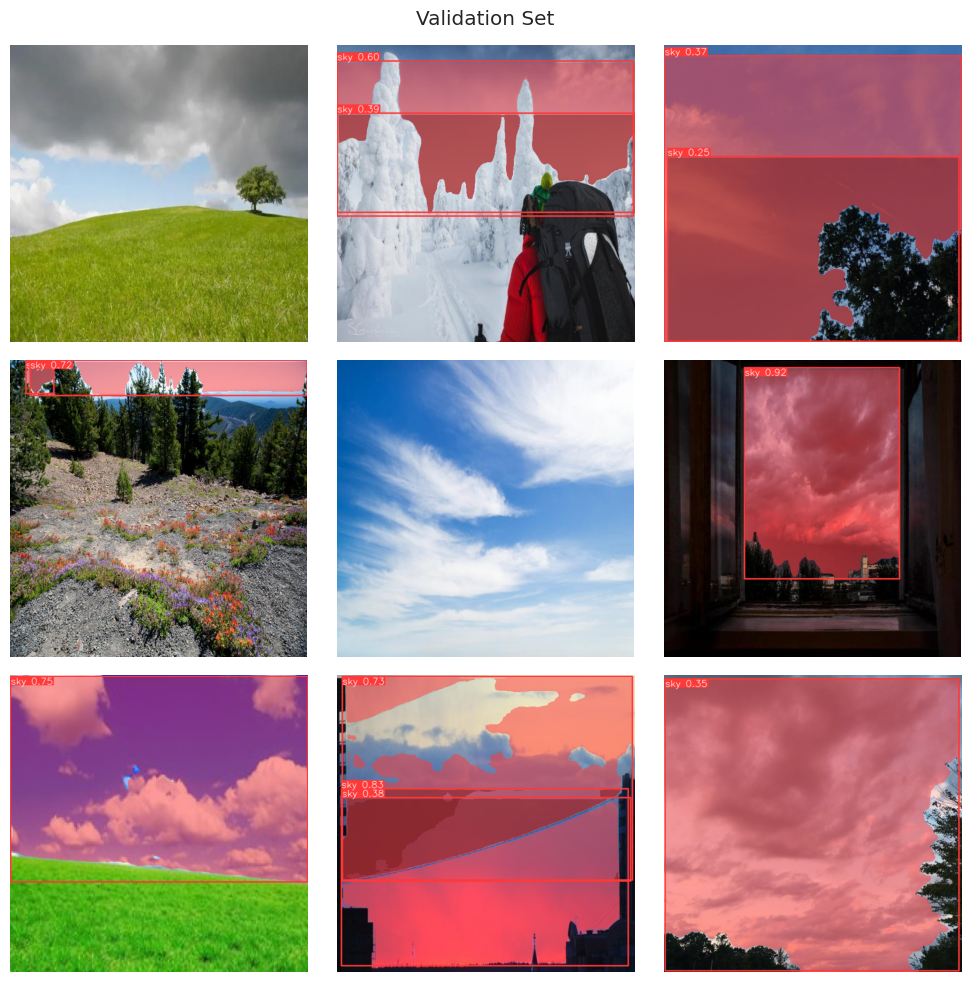

In [17]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()